<a href="https://colab.research.google.com/github/pnkcompany/Artificial_Intelligence/blob/main/19593_Priyanka_Muchandikar_Q2_HW5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best so far [2, 1, 0, 1, 2, 0, 2, 1, 0, 2] 11
Best so far [2, 0, 1, 1, 2, 0, 0, 2, 2, 2] 12
Best so far [0, 2, 2, 1, 2, 0, 0, 1, 2, 2] 12
Best so far [2, 2, 1, 2, 0, 0, 1, 2, 0, 1] 11
Best so far [1, 1, 2, 1, 2, 2, 0, 1, 2, 2] 14
Best so far [0, 2, 0, 2, 1, 2, 1, 1, 2, 2] 13
Best so far [0, 1, 2, 1, 0, 2, 0, 2, 1, 2] 11
Best so far [0, 1, 2, 1, 2, 2, 2, 1, 0, 2] 13
Best so far [2, 0, 1, 2, 2, 2, 2, 2, 2, 1] 16
Best so far [1, 2, 0, 1, 2, 1, 2, 2, 1, 2] 14
Best so far [1, 2, 2, 2, 2, 0, 0, 2, 2, 1] 14
Best so far [2, 1, 1, 0, 0, 2, 1, 2, 1, 2] 12
Best so far [2, 0, 1, 1, 0, 1, 2, 2, 2, 0] 11
Best so far [2, 1, 0, 2, 0, 0, 2, 2, 2, 2] 13
Best so far [2, 2, 2, 1, 1, 2, 0, 1, 0, 2] 13
Best so far [2, 2, 2, 2, 0, 1, 2, 2, 2, 2] 17
Best so far [0, 2, 1, 1, 0, 2, 2, 2, 2, 0] 12
Best so far [2, 1, 2, 2, 2, 0, 1, 1, 2, 1] 14
Best so far [0, 2, 0, 2, 1, 1, 2, 2, 0, 1] 11
Best so far [2, 0, 2, 0, 0, 1, 2, 2, 2, 1] 12
Best so far [2, 1, 0, 2, 2, 0, 1, 0, 2, 1] 11
Best so far [1, 0, 2, 0, 2, 1, 2, 

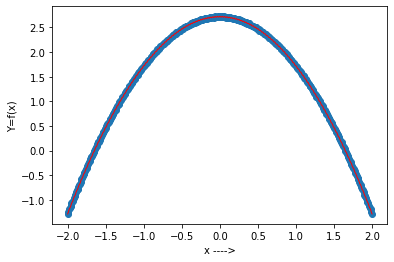

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.pyplot as plt
import math


def fitness(x):
    return math.exp(-x*x) + 0.01*math.cos(200*x)

def generate_parent(length, geneSet, get_fitness):
    genes = []
    while len(genes) < length:
      sampleSize = min(length - len(genes), len(geneSet))
      genes.extend(random.sample(geneSet, sampleSize))
    fitnesses = list(map(get_fitness, genes))
    return genes, fitnesses

def mutate(parent, geneSet, get_fitness):
    index = random.randrange(0, len(parent))
    childGenes, fitness = parent[:index] + geneSet[random.randrange(0, len(geneSet))] + parent[index + 1:]
    return childGenes, get_fitness(childGenes)

def crossover(parentGenes, popSize, get_fitness):
    offspring = []
    for _ in range(popSize):
      parent1 = random.randrange(0, popSize)
      parent2 = random.randrange(0, popSize)
      while parent1 == parent2:
        parent2 = random.randrange(0, popSize)
        parent1Genes = parentGenes[parent1]
        parent2Genes = parentGenes[parent2]
        half = len(parent1Genes) // 2
        child = parent1Genes[:half] + parent2Genes[half:]
        offspring.append(child)
    return offspring, list(map(get_fitness, offspring))

fx=[] 
x=np.arange(-2,2,0.009) #given x- range(-2,2)
for i in range(len(x)):
     x[i]=round(x[i],2)

for i in x:
    fx.append(math.e -i**2 + 0.01*(math.cos(200*i)))
    
def genetic(get_fitness, targetLen, optimalFitness, geneSet, display):
    random.seed()
    popSize = 100
    pop = []
    for _ in range(popSize):
      genes = [random.randint(0, 2) for _ in range(targetLen)]
      fitness = get_fitness(genes)
      pop.append((genes, fitness))
    
    seen = set()
    for i, individual in enumerate(pop):
      genes, fitness = individual
      if fitness > optimalFitness and tuple(genes) not in seen:
        print("Best so far {} {}".format(genes, fitness))
        seen.add(tuple(genes))
    
    generations = 0
    while not optimalFitness in [fitness for _, fitness in pop]:
      pop = sorted(pop, key = lambda x: x[1], reverse=True)
      parents = pop[:popSize//2]
      pop = pop[:popSize//2]
      random.shuffle(parents)
      for i in range(0, len(parents), 2):
        pop.extend(crossover(parents, popSize, get_fitness))
        pop = sorted(pop, key = lambda x: x[1], reverse=True)
        parents = pop[:popSize//2]
        pop = pop[:popSize//2]
        for individual in parents:
          if random.random() < 0.001:
            pop.append(mutate(individual, geneSet, get_fitness))
        generations += 1
        print("-- Generation {} --".format(generations))
        print("Best: {}".format(pop[0]))
    
    return generations, pop

target = 4.0
p_crossover = 0.9
p_mutation = 0.001

sol_per_pop = 10
num_parents_mating = 5

num_generations = 10

geneSet = [i/10 for i in range(-20, 21)]

length = 10

def get_fitness(genes):
    return sum(genes)

def display(candidate, startTime):
    timeDiff = datetime.now() - startTime
    print("{}\t{}\t{}".format(
        ', '.join(map(str, candidate.Genes)),
        candidate.Fitness,
        str(timeDiff)
    ))

optimalFitness = length

startTime = datetime.now()

generations, population = genetic(get_fitness, length, optimalFitness, geneSet, display) 
     
plt.xlabel("x ---->")
plt.ylabel('Y=f(x)')

plt.scatter(x,fx)
plt.plot(x,fx,'red',linewidth=1.0)
plt.show()